# **Bank Loan Analysis Report**

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # warnings in structured form without cluttering
import plotly.express as px  #  used to create interactive adv charts like tree & heat maps, scatter plots, area charts

In [ ]:
df = pd.read_excel("/content/financial_loan_data_excel.xlsx")

In [ ]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [ ]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### **Meta Data of Data**

In [ ]:
print("No. of Rows:", df.shape[0])    # , -> gives space before that number, [0] -> specifically gives number of only rows

No. of Rows: 38576


In [ ]:
print("No. of Columns:", df.shape[1])

No. of Columns: 24


In [ ]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat Technology Inc     C           RENT 2021-01-05   
3                  barnes distribution     B       MORTGAGE 2021-02-25   
4                        J&J Steel Inc     A       MORTGAGE 2021-01-01   
...                                ...   ...            ...        ...   
38571         Joseph M Sanzari Company     C       MORTGAGE 2021-07-11   
38572                        Swat Fame     C           RENT 2021-10-11   
38573  Anaheim Regional Medical Center     D           RENT 2021-09-11   
38574               Brooklyn Radiology     D           RENT 2021-10-11   
38575                    Allen Edmonds     F           RENT 2021-07-11   

      last_credit_pull_date last_payment_date  ... sub_grade        term  \
0                2021-09-13        2021-04-13  ...        C4   60 months   
1                2021-12-14        2021-01-15  ...        E1   36 months   
2                2021-12-12        2021-01-09  ...        C5   36 months   
3                2021-12-12        2021-03-12  ...        B2   60 months   
4                2021-12-14        2021-01-15  ...        A1   36 months   
...                     ...               ...  ...       ...         ...   
38571            2021-05-16        2021-05-16  ...        C1   60 months   
38572            2021-04-16        2021-05-16  ...        C1   60 months   
38573            2021-05-16        2021-05-16  ...        D5   60 months   
38574            2021-05-16        2021-05-16  ...        D5   60 months   
38575            2021-05-16        2021-05-16  ...        F3   60 months   

       verification_status annual_income     dti installment int_rate  \
0          Source Verified       30000.0  0.0100       59.83   0.1527   
1          Source Verified       48000.0  0.0535      109.43   0.1864   
2             Not Verified       50000.0  0.2088      421.65   0.1596   
3          Source Verified       42000.0  0.0540       97.06   0.1065   
4                 Verified       83000.0  0.0231      106.53   0.0603   
...                    ...           ...     ...         ...      ...   
38571             Verified      100000.0  0.1986      551.64   0.1299   
38572             Verified       50000.0  0.0458      579.72   0.1349   
38573             Verified       65000.0  0.1734      627.93   0.1749   
38574             Verified      368000.0  0.0009      612.72   0.1825   
38575             Verified       80000.0  0.0600      486.86   0.2099   

       loan_amount  total_acc  total_payment  
0             2500          4           1009  
1             3000          4           3939  
2            12000         11           3522  
3             4500          9           4911  
4             3500         28           3835  
...            ...        ...            ...  
38571        24250         33          31946  
38572        25200         18          31870  
38573        25000         20          35721  
38574        24000          9          33677  
38575        18000          7          27679  

[38

In [ ]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [ ]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


##**KPIs**

### Total Loan Applications

In [ ]:
total_loan_application = df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


### Month to Date (MTD) Total Loan Applications

In [ ]:
# to find this we need total number of applications for latest month, but the data here is historical, so we need to filter out the max(current) year and the month

latest_issue_date = df['issue_date'].max()    # latest date
latest_year = latest_issue_date.year          # with help of latest date we will get latest year
latest_month = latest_issue_date.month

# only filter data from issue_date column that is equal to latest_year, latest_month

mtd_data = df[(df['issue_date'].dt.year == latest_year)& (df['issue_date'].dt.month == latest_month)]  # df['issue_date'].dt.year -> extracting year from issue_date

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD loan applications (for {latest_issue_date.strftime('%B %Y')} ): {mtd_loan_applications}")       # latest_issue_date.strftime('%B %Y') -> formats the datetime

MTD loan applications (for December 2021 ): 4314


### Total Funded Amount

In [ ]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


### Month to Date (MTD) Total Funded Amount

In [ ]:
latest_issue_date = df['issue_date'].max()    # latest date
latest_year = latest_issue_date.year          # with help of latest date we will get latest year
latest_month = latest_issue_date.month

# only filter data from issue_date column that is equal to latest_year, latest_month

mtd_data = df[(df['issue_date'].dt.year == latest_year)& (df['issue_date'].dt.month == latest_month)]  # df['issue_date'].dt.year -> extracting year from issue_date

mtd_total_funded_amount = mtd_data['loan_amount'].sum()

mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


### Total Amount Recieved

In [ ]:
total_amount_recieved = df['total_payment'].sum()
total_amount_recieved_millions = total_amount_recieved/1000000
print("Total Amount Recieved: ${:.2f}M".format(total_amount_recieved_millions))

Total Amount Recieved: $473.07M


### MTD Total Amount Recieved

In [ ]:
latest_issue_date = df['issue_date'].max()    # latest date
latest_year = latest_issue_date.year          # with help of latest date we will get latest year
latest_month = latest_issue_date.month

# only filter data from issue_date column that is equal to latest_year, latest_month

mtd_data = df[(df['issue_date'].dt.year == latest_year)& (df['issue_date'].dt.month == latest_month)]  # df['issue_date'].dt.year -> extracting year from issue_date

mtd_total_amount_recieved = mtd_data['total_payment'].sum()

mtd_total_amount_recieved_millions = mtd_total_amount_recieved/1000000

print("MTD Total Amount Received: ${:.2f}M".format(mtd_total_amount_recieved_millions))

MTD Total Amount Received: $58.07M


### Average Interest Rate

In [ ]:
average_interest_rate = df['int_rate'].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


### Average Debt-to-Income Ratio (DTI)

In [ ]:
average_DTI = df['dti'].mean()*100
print("Average Debt-to-Income Ratio (DTI): {:.2f}%".format(average_DTI))

Average Debt-to-Income Ratio (DTI): 13.33%


### Good Loan Metrics

In [ ]:
good_loans = df[df['loan_status'].isin(["Fully Paid","Current"])]   # identifying good loans

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()

good_loan_funded_amount = good_loans['loan_amount'].sum()

good_loan_recieved = good_loans['total_payment'].sum()


good_loan_funded_amount_millions = good_loan_funded_amount/1000000

good_loan_recieved_millions = good_loan_recieved/1000000

good_loan_percentage = (good_loan_applications/total_loan_applications)*100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount in Millions: ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Received in Millions: ${:.2f}M".format(good_loan_recieved_millions))
print("Good Loan Percentage: {:.2f}%".format(good_loan_percentage))


Good Loan Applications: 33243
Good Loan Funded Amount in Millions: $370.22M
Good Loan Received in Millions: $435.79M
Good Loan Percentage: 86.18%


### Bad Loan Metrics

In [ ]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()

bad_loan_funded_amount = bad_loans['loan_amount'].sum()

bad_loan_recieved = bad_loans['total_payment'].sum()


bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000

bad_loan_recieved_millions = bad_loan_recieved/1000000

bad_loan_percentage = (bad_loan_applications/total_loan_applications)*100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount in Millions: ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Received in Millions: ${:.2f}M".format(bad_loan_recieved_millions))
print("Bad Loan Percentage: {:.2f}%".format(bad_loan_percentage))


Bad Loan Applications: 5333
Bad Loan Funded Amount in Millions: $65.53M
Bad Loan Received in Millions: $37.28M
Bad Loan Percentage: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

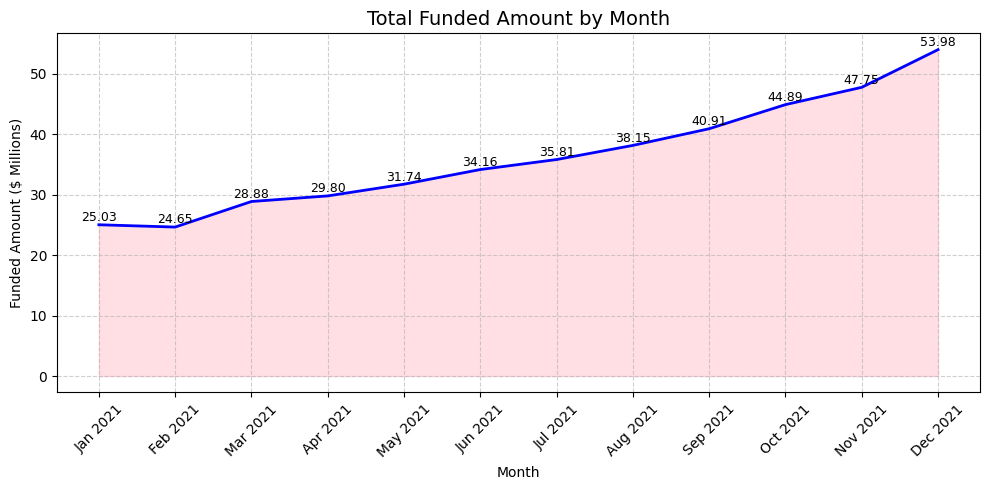

In [ ]:
# 1st we will create a variable(monthly_funded) to prepare/store data

# as we want monthly trends, so we need to extract the month from issue date
monthly_funded = ( df.sort_values('issue_date')     # we need chronological order of the months from Jan to Dec; sorts our original DataFrame chronologically.
                     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))   # cfreating a new column for months. dt.strftime -> converting date format to %b as month %Y as 4 digit year
                     .groupby('month_name', sort=False)['loan_amount']      # sort=False -> To keep the sorting same as we did here sort_values('issue_date') orlese it will create new sot based on month name column
                                                                            # ['loan_amount']  -> the value we want in front of month name is funded amount
                     .sum()       # while grouping we always have to mention by what aggregation we want to group it
                     .div(1000000) # want values in millions
                     .reset_index(name = 'loan_amount_millions')      # turns the grouped Series back into a DataFrame with two columns: month_name, loan_amount_millions
                                                                       # turns the index (month_name) back into a column and names the summed column loan_amount_millions
                 )


# now that data has been created we will plot this data

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='pink', alpha=0.5)      # alpha=0.5 -> color transparency of particular color
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], linewidth=2, color='blue')   # ploting the line on the chart

# adding lables to the line chart

for i, row in monthly_funded.iterrows():        # The for loop adds a value label above each point in our line chart
    plt.text(
        i,                                      # x-position (point index), i is the integer position of the point on the x-axis (our xticks later map these to month names)
        row['loan_amount_millions'] + 0.1,      # y-position (slightly above the point)
        f"{row['loan_amount_millions']:.2f}",   # label text, formatted to 2 decimals
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)      # ticks=range(len(monthly_funded)) -> places ticks at positions 0, 1, 2, ... up to the number of rows in monthly_funded
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### Monthly Trends by Issue Date for Total Amount Recieved

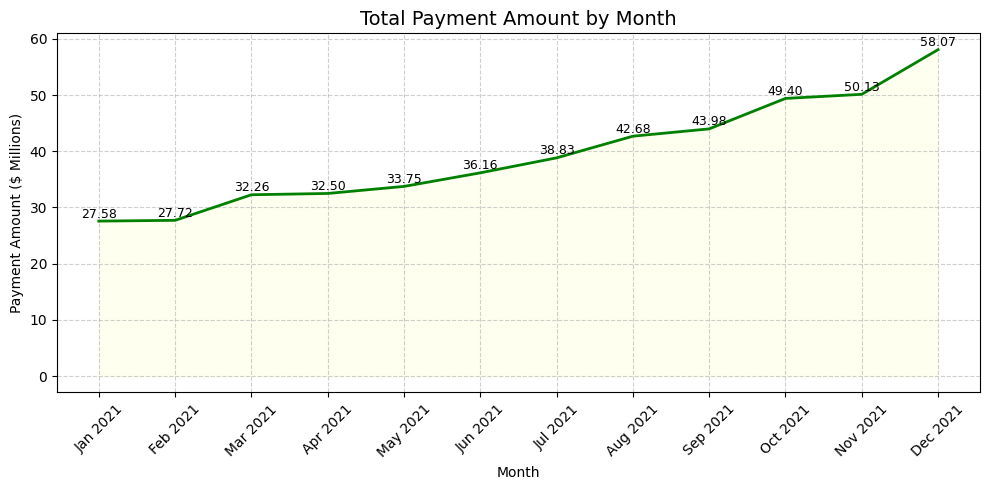

In [ ]:
# as we want monthly trends, so we need to extract the month from issue date
monthly_recieved = ( df.sort_values('issue_date')     # we need chronological order of the months from Jan to Dec
                     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))   # for creating a new column for months; dt.strftime -> converting date format to %b as month %Y as 4 digit year
                     .groupby('month_name', sort=False)['total_payment']      # sort=False -> To keep the sorting same as we did here sort_values('issue_date') orlese it will create new sot based on month name column
                                                                            # ['loan_amount']  -> the value we want in front of month name is funded amount
                     .sum()       # while grouping we always have to mention by what aggregation we want to group it
                     .div(1000000) # want values in millions
                     .reset_index(name = 'loan_payment_millions')          # new name given to column that's created by summing, div the loan_amount values

                 )

# now that data has been created we will plot this data

plt.figure(figsize=(10,5))
plt.fill_between(monthly_recieved['month_name'], monthly_recieved['loan_payment_millions'], color='lightyellow', alpha=0.5)      # alpha=0.5 -> color transparency of particular color
plt.plot(monthly_recieved['month_name'], monthly_recieved['loan_payment_millions'], linewidth=2, color='green')   # ploting the line on the chart

# adding lables to the line chart

for i, row in monthly_recieved.iterrows():        # The for loop adds a value label above each point in our line chart
    plt.text(
        i,                                      # x-position (point index), i is the integer position of the point on the x-axis (our xticks later map these to month names)
        row['loan_payment_millions'] + 0.1,      # y-position (slightly above the point)
        f"{row['loan_payment_millions']:.2f}",   # label text, formatted to 2 decimals
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

plt.title('Total Payment Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Payment Amount ($ Millions)')
plt.xticks(ticks=range(len(monthly_recieved)), labels = monthly_recieved['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends by Issue Date for Total Loan Applications

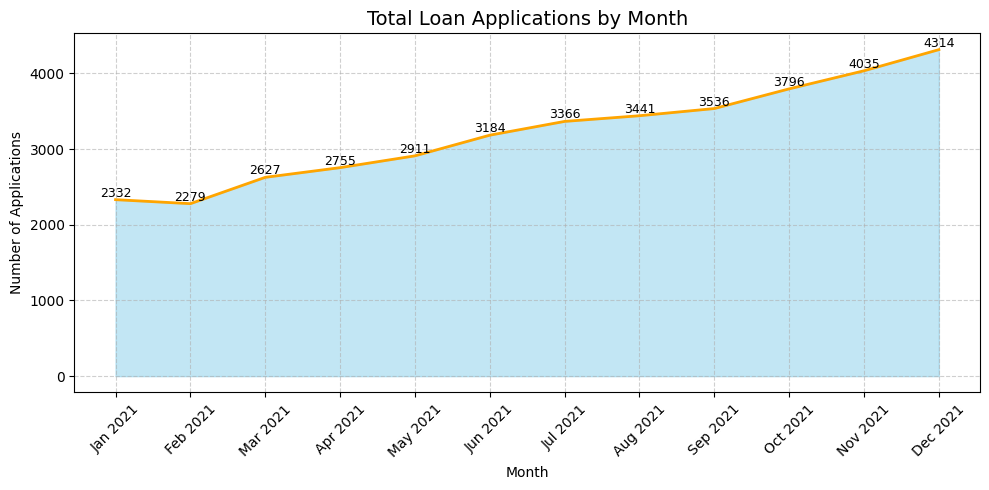

In [ ]:
monthly_applications = ( df.sort_values('issue_date')     # we need chronological order of the months from Jan to Dec
                     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))   # for creating a new column for months; dt.strftime -> converting date format to %b as month %Y as 4 digit year
                     .groupby('month_name', sort=False)['id']      # sort=False -> To keep the sorting same as we did here sort_values('issue_date') orlese it will create new sot based on month name column
                                                                            # ['id']  -> the value we want in front of month name is funded amount
                     .count()       # while grouping we always have to mention by what aggregation we want to group it

                     .reset_index(name = 'loan_applications_count')          # new name given to column that's created by summing, div the loan_amount values

                 )

# now that data has been created we will plot this data

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color='skyblue', alpha=0.5)      # alpha=0.5 -> color transparency of particular color
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'], linewidth=2, color='orange')   # ploting the line on the chart

# adding lables to the line chart

for i, row in monthly_applications.iterrows():        # The for loop adds a value label above each point in our line chart
    plt.text(
        i,                                      # x-position (point index), i is the integer position of the point on the x-axis (our xticks later map these to month names)
        row['loan_applications_count'] + 0.5,      # y-position (slightly above the point)
        f"{row['loan_applications_count']}",   # label text, formatted to 2 decimals
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels = monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Regional Analysis By State for Total Funded Amount

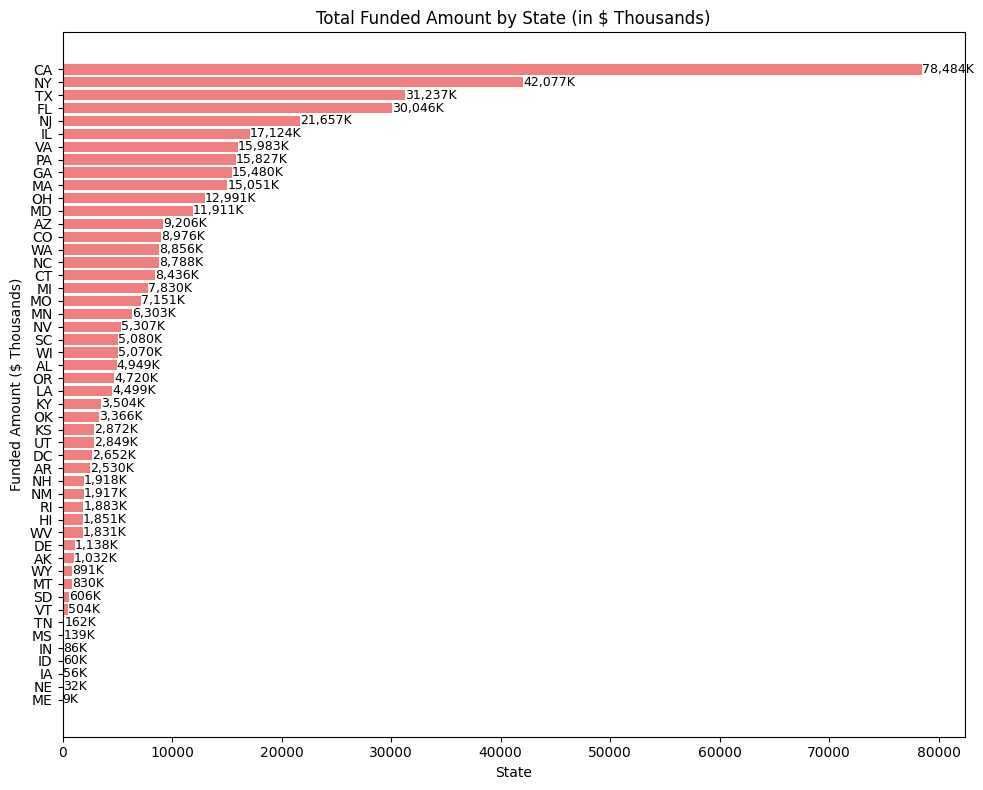

In [ ]:
# here there is no need to create a new column



regional_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)       # sort_values(ascending=True) -> to display values from highest to lowest on horizontal bars

regional_funding_thousands = regional_funding/1000



# now that data has been created we will plot this data

plt.figure(figsize=(10,8))
bars = plt.barh(regional_funding_thousands.index, regional_funding_thousands.values, color = 'lightcoral')    # barh is for horizontal bars

# adding lables

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width:,.0f}K', va='center', fontsize = 9)


plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('State')
plt.ylabel('Funded Amount ($ Thousands)')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Amount Recieved

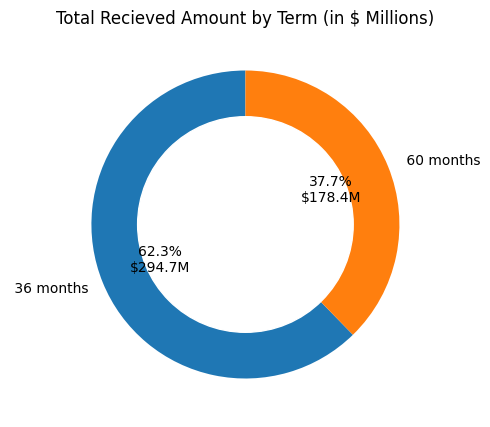

In [ ]:
loan_term = df.groupby('term')['total_payment'].sum()/1000000


plt.figure(figsize=(5,5))
plt.pie(loan_term, labels = loan_term.index,
        autopct=lambda p: f"{p:.1f}%\n${p*sum(loan_term)/100:.1f}M",      # to convert the amount into millions
        startangle=90,
        wedgeprops = {'width': 0.4}
        )

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))      # this is to add the inner circle for donut shape
plt.title('Total Recieved Amount by Term (in $ Millions)')
plt.show()

### Employee Length for Total Loan Applications

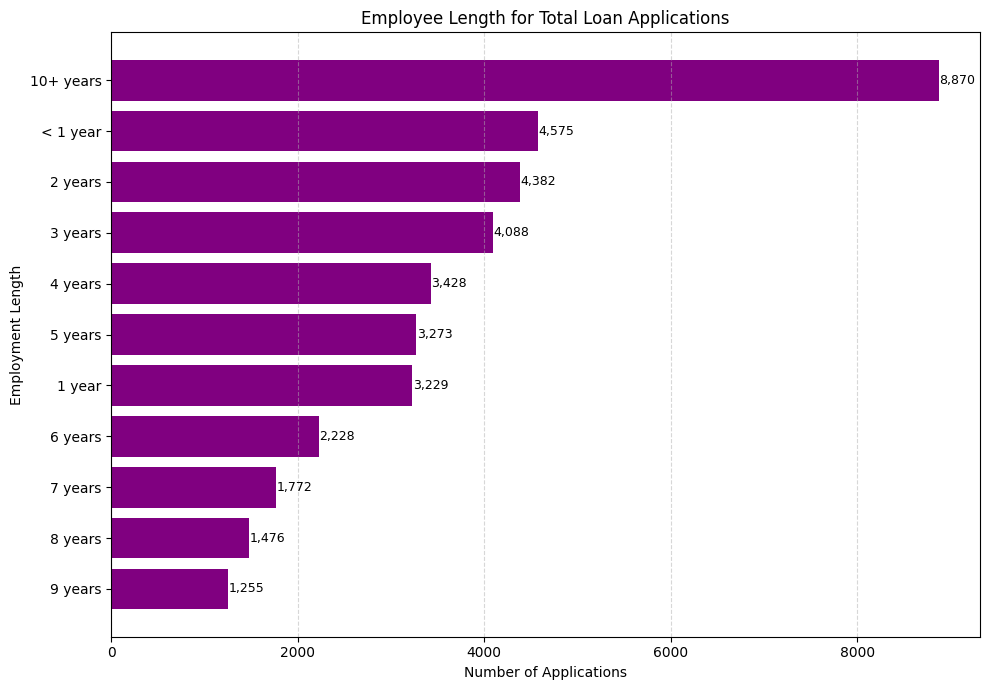

In [ ]:
employment_duration = df.groupby('emp_length')['id'].count().sort_values(ascending=True)       # sort_values(ascending=True) -> to display values from highest to lowest on horizontal bars


# now that data has been created we will plot this data

plt.figure(figsize=(10,7))
bars = plt.barh(employment_duration.index, employment_duration.values, color = 'purple')    # barh is for horizontal bars

# adding lables

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center', fontsize = 9)


plt.title('Employee Length for Total Loan Applications')
plt.ylabel('Employment Length')
plt.xlabel('Number of Applications')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Loan Purpose by Total Funded Amount

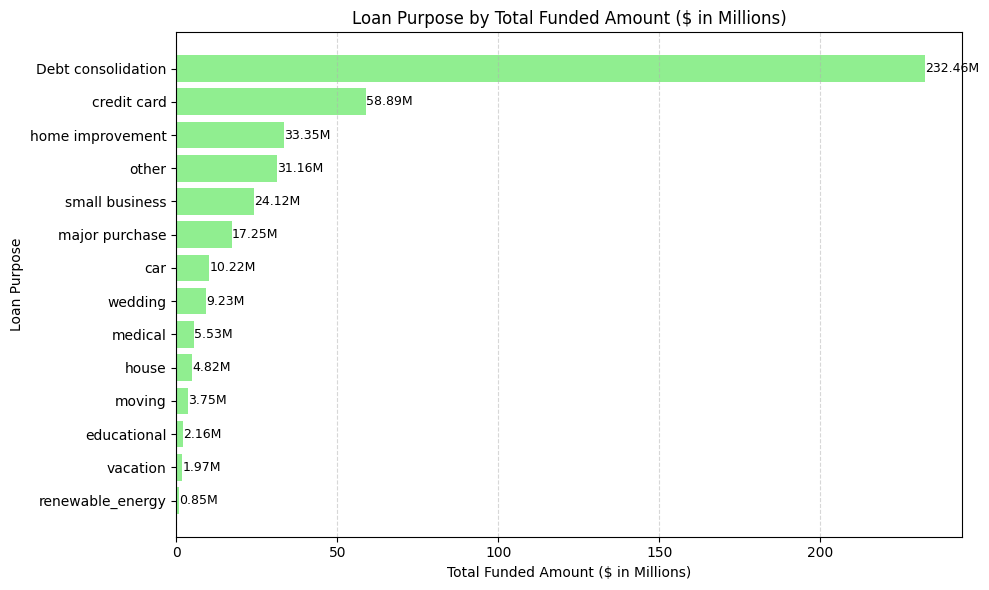

In [ ]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)

plt.figure(figsize =(10,6))

bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color = 'lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.2f}M', va='center', fontsize = 9)


plt.title('Loan Purpose by Total Funded Amount ($ in Millions)')
plt.xlabel('Total Funded Amount ($ in Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Home Ownership by Total Amount Recieved

In [ ]:
home_funding = df.groupby('home_ownership')['total_payment'].sum().reset_index()

home_funding['total_payment_millions'] = home_funding['total_payment']/1000000

fig = px.treemap(

    home_funding,
    path = ['home_ownership'],                # each rectangle = one ownership category
    values = 'total_payment_millions',        # area size = total payment (in millions)
    color = 'total_payment_millions',         # color encodes the same metric
    color_continuous_scale = 'RdBu',
    title = 'Home Ownership by Total Amount Recieved ($ Millions)'
)

fig.show()